# Abstract / Conclusion

|                           | Acc       | B. Acc    | FPR       | MCC       | AUROC<sub>score</sub> | Precision | Recall    |
|---------------------------|-----------|-----------|-----------|-----------|-----------------------|-----------|-----------|
| ION (High-Recall Mode)    | **0.860** | 0.724     | 0.443     | **0.361** | **0.858**             | 0.952     | **0.890** |
| ION (Standard Mode)       | 0.742     | **0.784** | 0.165     | 0.351     | 0.851                 | 0.978     | 0.732     |
| ION (High-Precision Mode) | 0.429     | 0.673     | **0.028** | 0.210     | 0.855                 | **0.992** | 0.374     |
| Filters (Intropolis)      | 0.366     | 0.633     | 0.040     | 0.171     | 0.633                 | 0.987     | 0.306     |
| Filters (Recount3)        | 0.701     | 0.654     | 0.403     | 0.191     | 0.654                 | 0.946     | 0.711     |
| SPLAM<sup>1</sup>         | 0.483     | 0.674     | 0.091     | 0.205     | 0.831                 | 0.674     | 0.674     |


In [1]:
import pandas as pd
from sklearn.metrics import balanced_accuracy_score, matthews_corrcoef, confusion_matrix, accuracy_score, roc_curve, auc, recall_score, precision_score
import matplotlib.pyplot as plt

In [2]:
df_annotator_checked_introns = pd.read_csv("benchmarking/annotators_checked_introns_with_filters.txt", sep="\t")
df_annotator_checked_introns

,chr,start,end,strand,manual_assessment,previously_annotated,recount3_score,intropolis_score,repeat_overlap,antisense_overlap,intron_length,prediction_recount3,prediction_intropolis
0,2,28709500,28736042,-1,Yes,no,0,0,No_overlap,no,26543,REJECTED,REJECTED
1,9,824689,826529,-1,Yes,no,0,0,No_overlap,no,1841,REJECTED,REJECTED
2,7,5847591,5848561,-1,No,no,0,0,Type_I_Transposons/SINE,yes,971,REJECTED,REJECTED
3,4,37001896,37109279,1,Yes,no,0,3,LTRs,no,107384,REJECTED,ACCEPTED
4,2,236593224,236594644,1,Yes,no,0,0,Type_I_Transposons/SINE,no,1421,REJECTED,REJECTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,226186942,226197051,1,Yes,no,199,0,No_overlap,no,10110,ACCEPTED,REJECTED
1996,1,83764416,83766573,-1,Yes,no,199,0,No_overlap,yes,2158,REJECTED,REJECTED
1997,13,29647394,29655072,1,Yes,no,199,0,Type_I_Transposons/LINE,no,7679,ACCEPTED,REJECTED
1998,7,135773316,135774320,1,Yes,no,199,0,Type_II_Transposons,no,1005,ACCEPTED,REJECTED


In [3]:
df_annotator_checked_introns = df_annotator_checked_introns.copy().loc[df_annotator_checked_introns.previously_annotated == "no"]
df_annotator_checked_introns

,chr,start,end,strand,manual_assessment,previously_annotated,recount3_score,intropolis_score,repeat_overlap,antisense_overlap,intron_length,prediction_recount3,prediction_intropolis
0,2,28709500,28736042,-1,Yes,no,0,0,No_overlap,no,26543,REJECTED,REJECTED
1,9,824689,826529,-1,Yes,no,0,0,No_overlap,no,1841,REJECTED,REJECTED
2,7,5847591,5848561,-1,No,no,0,0,Type_I_Transposons/SINE,yes,971,REJECTED,REJECTED
3,4,37001896,37109279,1,Yes,no,0,3,LTRs,no,107384,REJECTED,ACCEPTED
4,2,236593224,236594644,1,Yes,no,0,0,Type_I_Transposons/SINE,no,1421,REJECTED,REJECTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,226186942,226197051,1,Yes,no,199,0,No_overlap,no,10110,ACCEPTED,REJECTED
1996,1,83764416,83766573,-1,Yes,no,199,0,No_overlap,yes,2158,REJECTED,REJECTED
1997,13,29647394,29655072,1,Yes,no,199,0,Type_I_Transposons/LINE,no,7679,ACCEPTED,REJECTED
1998,7,135773316,135774320,1,Yes,no,199,0,Type_II_Transposons,no,1005,ACCEPTED,REJECTED


In [4]:
df_annotator_checked_introns["start"] = df_annotator_checked_introns["start"] - 1
df_annotator_checked_introns['strand'].replace({1: '+', -1: '-'}, inplace=True)
df_annotator_checked_introns['manual_assessment'].replace({'Yes': 1, "No": 0}, inplace=True)
df_annotator_checked_introns["chr"] = "chr" + df_annotator_checked_introns["chr"]
df_annotator_checked_introns['class'] = df_annotator_checked_introns['manual_assessment']

In [5]:
df_annotator_checked_introns

,chr,start,end,strand,manual_assessment,previously_annotated,recount3_score,intropolis_score,repeat_overlap,antisense_overlap,intron_length,prediction_recount3,prediction_intropolis,class
0,chr2,28709499,28736042,-,1,no,0,0,No_overlap,no,26543,REJECTED,REJECTED,1
1,chr9,824688,826529,-,1,no,0,0,No_overlap,no,1841,REJECTED,REJECTED,1
2,chr7,5847590,5848561,-,0,no,0,0,Type_I_Transposons/SINE,yes,971,REJECTED,REJECTED,0
3,chr4,37001895,37109279,+,1,no,0,3,LTRs,no,107384,REJECTED,ACCEPTED,1
4,chr2,236593223,236594644,+,1,no,0,0,Type_I_Transposons/SINE,no,1421,REJECTED,REJECTED,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,chr1,226186941,226197051,+,1,no,199,0,No_overlap,no,10110,ACCEPTED,REJECTED,1
1996,chr1,83764415,83766573,-,1,no,199,0,No_overlap,yes,2158,REJECTED,REJECTED,1
1997,chr13,29647393,29655072,+,1,no,199,0,Type_I_Transposons/LINE,no,7679,ACCEPTED,REJECTED,1
1998,chr7,135773315,135774320,+,1,no,199,0,Type_II_Transposons,no,1005,ACCEPTED,REJECTED,1


In [6]:
df_annotator_checked_introns[["chr", "start", "end", "recount3_score", "class", "strand"]].to_csv("benchmarking/annotators_checked_introns.bed", sep="\t", header=False, index=False)

# Benchmarking using Splam: a deep-learning-based splice site predictor that improves spliced alignments
bioRxiv. 2023 Jul 29;2023.07.27.550754. doi: 10.1101/2023.07.27.550754. Preprint

In [7]:
!splam score -G ./data/human_ref_hg38_109/GRCh38.primary_assembly.genome.fa -m ./data/splam/splam_script.pt -o splam_out benchmarking/annotators_checked_introns.bed

 An accurate spliced alignment pruner and splice junction predictor. 


  ███████╗██████╗ ██╗      █████╗ ███╗   ███╗
  ██╔════╝██╔══██╗██║     ██╔══██╗████╗ ████║
  ███████╗██████╔╝██║     ███████║██╔████╔██║
  ╚════██║██╔═══╝ ██║     ██╔══██║██║╚██╔╝██║
  ███████║██║     ███████╗██║  ██║██║ ╚═╝ ██║
  ╚══════╝╚═╝     ╚══════╝╚═╝  ╚═╝╚═╝     ╚═╝
    
[Info] Chromosomes in the annotation file is in 'chr*' style
[Info] Running model in "cuda" mode
[Info] Loading model ... (./data/splam/splam_script.pt)
model = torch.load(model_path)!!
[Info] Done loading model
[Info] Loading data ...
	 1919  junctions loaded.
[Info] Done loading data
[Info] SPLAM!  |################################| 192/192


In [8]:
df_splam_pred = pd.read_csv("benchmarking/splam_out_lncRNA/junction_score.bed", sep="\t", names=["chr","start","end",'rc3_score','class','strand','donor_score','acceptor_score','u']).drop(columns="u")
df_splam_pred

,chr,start,end,rc3_score,class,strand,donor_score,acceptor_score
0,chr2,28709499,28736042,0,1,-,2.156247e-06,7.677897e-06
1,chr9,824688,826529,0,1,-,9.772809e-01,9.829963e-01
2,chr7,5847590,5848561,0,0,-,2.012902e-15,3.102351e-15
3,chr4,37001895,37109279,0,1,+,9.916936e-01,9.850734e-01
4,chr2,236593223,236594644,0,1,+,5.358051e-05,1.399107e-04
...,...,...,...,...,...,...,...,...
1914,chr1,226186941,226197051,199,1,+,9.883432e-01,9.870725e-01
1915,chr1,83764415,83766573,199,1,-,3.786698e-03,7.391541e-03
1916,chr13,29647393,29655072,199,1,+,1.814360e-02,1.460467e-02
1917,chr7,135773315,135774320,199,1,+,2.264296e-01,2.271318e-01


In [9]:
df_splam_pred["splam_pred"] = ((df_splam_pred['donor_score'] >= 0.5) & (df_splam_pred['acceptor_score'] >= 0.5)).astype(int)
df_splam_pred

,chr,start,end,rc3_score,class,strand,donor_score,acceptor_score,splam_pred
0,chr2,28709499,28736042,0,1,-,2.156247e-06,7.677897e-06,0
1,chr9,824688,826529,0,1,-,9.772809e-01,9.829963e-01,1
2,chr7,5847590,5848561,0,0,-,2.012902e-15,3.102351e-15,0
3,chr4,37001895,37109279,0,1,+,9.916936e-01,9.850734e-01,1
4,chr2,236593223,236594644,0,1,+,5.358051e-05,1.399107e-04,0
...,...,...,...,...,...,...,...,...,...
1914,chr1,226186941,226197051,199,1,+,9.883432e-01,9.870725e-01,1
1915,chr1,83764415,83766573,199,1,-,3.786698e-03,7.391541e-03,0
1916,chr13,29647393,29655072,199,1,+,1.814360e-02,1.460467e-02,0
1917,chr7,135773315,135774320,199,1,+,2.264296e-01,2.271318e-01,0


In [10]:
df_splam_pred["splam_pred_avg"] = df_splam_pred[['donor_score', 'acceptor_score']].min(axis=1)
df_splam_pred

,chr,start,end,rc3_score,class,strand,donor_score,acceptor_score,splam_pred,splam_pred_avg
0,chr2,28709499,28736042,0,1,-,2.156247e-06,7.677897e-06,0,2.156247e-06
1,chr9,824688,826529,0,1,-,9.772809e-01,9.829963e-01,1,9.772809e-01
2,chr7,5847590,5848561,0,0,-,2.012902e-15,3.102351e-15,0,2.012902e-15
3,chr4,37001895,37109279,0,1,+,9.916936e-01,9.850734e-01,1,9.850734e-01
4,chr2,236593223,236594644,0,1,+,5.358051e-05,1.399107e-04,0,5.358051e-05
...,...,...,...,...,...,...,...,...,...,...
1914,chr1,226186941,226197051,199,1,+,9.883432e-01,9.870725e-01,1,9.870725e-01
1915,chr1,83764415,83766573,199,1,-,3.786698e-03,7.391541e-03,0,3.786698e-03
1916,chr13,29647393,29655072,199,1,+,1.814360e-02,1.460467e-02,0,1.460467e-02
1917,chr7,135773315,135774320,199,1,+,2.264296e-01,2.271318e-01,0,2.264296e-01


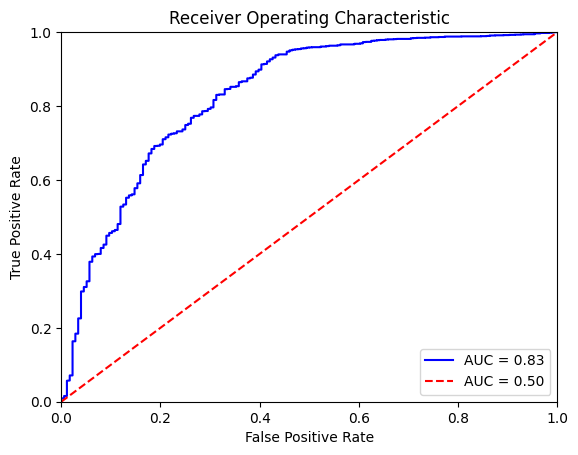

In [11]:
fpr, tpr, thresholds = roc_curve(df_splam_pred["class"], df_splam_pred["splam_pred_avg"], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1],'r--', label="AUC = 0.50")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [12]:
tn, fp, fn, tp = confusion_matrix(df_splam_pred["class"], df_splam_pred["splam_pred"]).ravel()
fpr = fp/(fp+tn)
mcc = matthews_corrcoef(df_splam_pred["class"], df_splam_pred["splam_pred"])
BAcc = balanced_accuracy_score(df_splam_pred["class"], df_splam_pred["splam_pred"])
recall = recall_score(df_splam_pred["class"], df_splam_pred["splam_pred"])
precision = precision_score(df_splam_pred["class"], df_splam_pred["splam_pred"])

print("MetricsforSPLAM")
print("FPR:", fpr)
print("MCC:", mcc)
print("Accuracy:", (tn+tp)/(tn+fp+fn+tp))
print("Balanced Accuracy:", BAcc)
print("Recall:", BAcc)
print("Precision:", BAcc)
print("AUROC:", roc_auc)

MetricsforSPLAM
FPR: 0.09090909090909091
MCC: 0.20474005114699717
Accuracy: 0.4825429911412194
Balanced Accuracy: 0.6742815417514212
Recall: 0.6742815417514212
Precision: 0.6742815417514212
AUROC: 0.8307923251447349


# Filter (Intropolis) - Benchmark

In [13]:
df_annotator_checked_introns = df_annotator_checked_introns.replace({'ACCEPTED': 1, 'REJECTED': 0})
df_annotator_checked_introns

,chr,start,end,strand,manual_assessment,previously_annotated,recount3_score,intropolis_score,repeat_overlap,antisense_overlap,intron_length,prediction_recount3,prediction_intropolis,class
0,chr2,28709499,28736042,-,1,no,0,0,No_overlap,no,26543,0,0,1
1,chr9,824688,826529,-,1,no,0,0,No_overlap,no,1841,0,0,1
2,chr7,5847590,5848561,-,0,no,0,0,Type_I_Transposons/SINE,yes,971,0,0,0
3,chr4,37001895,37109279,+,1,no,0,3,LTRs,no,107384,0,1,1
4,chr2,236593223,236594644,+,1,no,0,0,Type_I_Transposons/SINE,no,1421,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,chr1,226186941,226197051,+,1,no,199,0,No_overlap,no,10110,1,0,1
1996,chr1,83764415,83766573,-,1,no,199,0,No_overlap,yes,2158,0,0,1
1997,chr13,29647393,29655072,+,1,no,199,0,Type_I_Transposons/LINE,no,7679,1,0,1
1998,chr7,135773315,135774320,+,1,no,199,0,Type_II_Transposons,no,1005,1,0,1


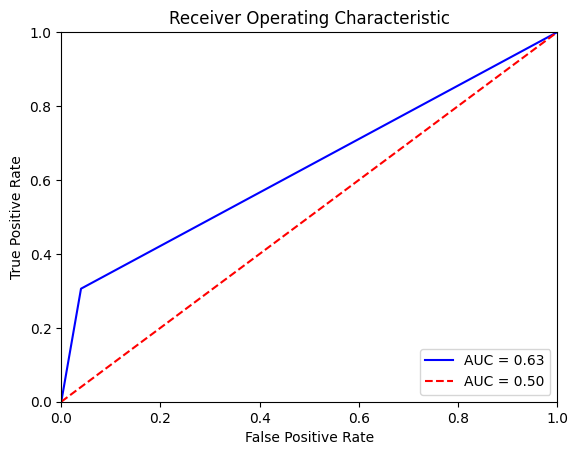

In [14]:
fpr1, tpr1, thresholds1 = roc_curve(df_annotator_checked_introns["manual_assessment"], df_annotator_checked_introns["prediction_intropolis"], pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b', label = 'AUC = %0.2f' % roc_auc1)
plt.plot([0, 1], [0, 1],'r--', label="AUC = 0.50")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [15]:
tn1, fp1, fn1, tp1 = confusion_matrix(df_annotator_checked_introns["manual_assessment"], df_annotator_checked_introns["prediction_intropolis"]).ravel()
fpr1 = fp1/(fp1+tn1)
mcc1 = matthews_corrcoef(df_annotator_checked_introns["manual_assessment"], df_annotator_checked_introns["prediction_intropolis"])
BAcc1 = balanced_accuracy_score(df_annotator_checked_introns["manual_assessment"], df_annotator_checked_introns["prediction_intropolis"])
acc1 = accuracy_score(df_annotator_checked_introns["manual_assessment"], df_annotator_checked_introns["prediction_intropolis"])
recall1 = recall_score(df_annotator_checked_introns["manual_assessment"], df_annotator_checked_introns["prediction_intropolis"])
precision1 = precision_score(df_annotator_checked_introns["manual_assessment"], df_annotator_checked_introns["prediction_intropolis"])

print("Metrics for Filter (Intropolis)")
print("FPR: ", fpr1)
print("MCC: ", mcc1)
print("Accuracy: ", acc1)
print("Balanced Accuracy: ", BAcc1)
print("Recall:", recall1)
print("Precision:", precision1)
print("AUROC: ", roc_auc1)

Metrics for Filter (Intropolis)
FPR:  0.03977272727272727
MCC:  0.17074318262868127
Accuracy:  0.3658155289213132
Balanced Accuracy:  0.6330109398633494
Recall: 0.3057946069994263
Precision: 0.987037037037037
AUROC:  0.6330109398633494


# Filter (Recount3) - Benchmark

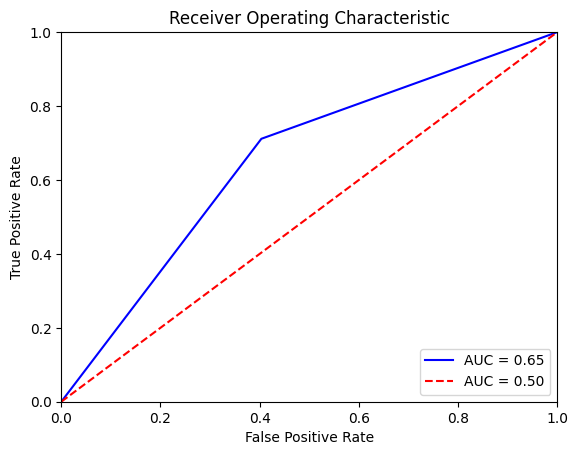

In [16]:
fpr2, tpr2, thresholds2 = roc_curve(df_annotator_checked_introns["class"], df_annotator_checked_introns["prediction_recount3"], pos_label=1)
roc_auc2 = auc(fpr2, tpr2)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr2, tpr2, 'b', label='AUC = %0.2f' % roc_auc2)
plt.plot([0, 1], [0, 1], 'r--', label="AUC = 0.50")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [17]:
tn2, fp2, fn2, tp2 = confusion_matrix(df_annotator_checked_introns["class"], df_annotator_checked_introns["prediction_recount3"]).ravel()
fpr2 = fp2 / (fp2 + tn2)
mcc2 = matthews_corrcoef(df_annotator_checked_introns["class"], df_annotator_checked_introns["prediction_recount3"])
BAcc2 = balanced_accuracy_score(df_annotator_checked_introns["class"], df_annotator_checked_introns["prediction_recount3"])
recall2 = recall_score(df_annotator_checked_introns["class"], df_annotator_checked_introns["prediction_recount3"])
precision2 = precision_score(df_annotator_checked_introns["class"], df_annotator_checked_introns["prediction_recount3"])
acc2 = accuracy_score(df_annotator_checked_introns["class"], df_annotator_checked_introns["prediction_recount3"])

print("Metrics for ION (High Recall Mode)")
print("FPR:", fpr2)
print("MCC:", mcc2)
print("Accuracy:", acc2)
print("Balanced Accuracy:", BAcc2)
print("Recall:", recall2)
print("Precision:", precision2)
print("AUROC:", roc_auc2)

Metrics for ION (High Recall Mode)
FPR: 0.4034090909090909
MCC: 0.1910794124676483
Accuracy: 0.7008858780614904
Balanced Accuracy: 0.6540040030250873
Recall: 0.7114170969592656
Precision: 0.9458428680396643
AUROC: 0.6540040030250873


# ION (High-Recall Mode)
Command ran: python3 ION.py --mode high-recall --type bed --file ../../benchmarking/annotators_checked_introns.bed

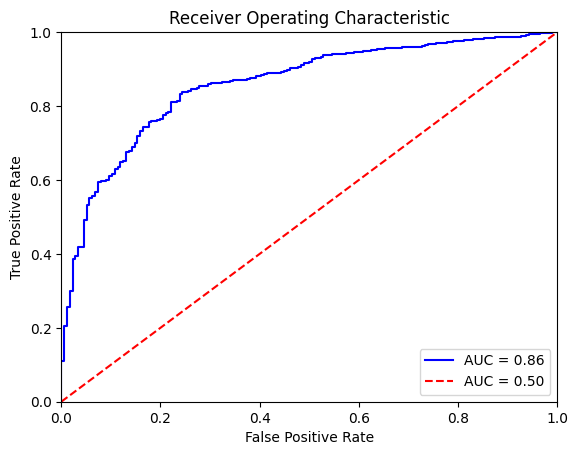

In [18]:
df_ion3 = pd.read_csv("benchmarking/ION_out_lncRNA/output_high_recall_mode.bed", sep="\t")
df_ion3["class"] = df_ion3["u2"]
df_ion3["prediction_class"] = (df_ion3["prediction"] >= 0.5).astype(int)
fpr3, tpr3, thresholds3 = roc_curve(df_ion3["class"], df_ion3["prediction"], pos_label=1)
roc_auc3 = auc(fpr3, tpr3)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr3, tpr3, 'b', label='AUC = %0.2f' % roc_auc3)
plt.plot([0, 1], [0, 1], 'r--', label="AUC = 0.50")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [19]:
tn3, fp3, fn3, tp3 = confusion_matrix(df_ion3["class"], df_ion3["prediction_class"]).ravel()
fpr3 = fp3 / (fp3 + tn3)
mcc3 = matthews_corrcoef(df_ion3["class"], df_ion3["prediction_class"])
BAcc3 = balanced_accuracy_score(df_ion3["class"], df_ion3["prediction_class"])
recall3 = recall_score(df_ion3["class"], df_ion3["prediction_class"])
precision3 = precision_score(df_ion3["class"], df_ion3["prediction_class"])
Acc3 = accuracy_score(df_ion3["class"], df_ion3["prediction_class"])

print("Metrics for ION (High Recall Mode)")
print("FPR:", fpr3)
print("MCC:", mcc3)
print("Accuracy:", (tn3+tp3)/(tn3+ fp3+ fn3+ tp3))
print("Balanced Accuracy:", BAcc3)
print("Recall:", recall3)
print("Precision:", precision3)
print("AUROC:", roc_auc3)

Metrics for ION (High Recall Mode)
FPR: 0.4431818181818182
MCC: 0.36091092569319994
Accuracy: 0.859822824387702
Balanced Accuracy: 0.7236184999739217
Recall: 0.8904188181296615
Precision: 0.9521472392638037
AUROC: 0.8576742033067334


# ION (Standard Mode)
Command ran: python3 ION.py --mode standard --type bed --file ../../benchmarking/annotators_checked_introns.bed

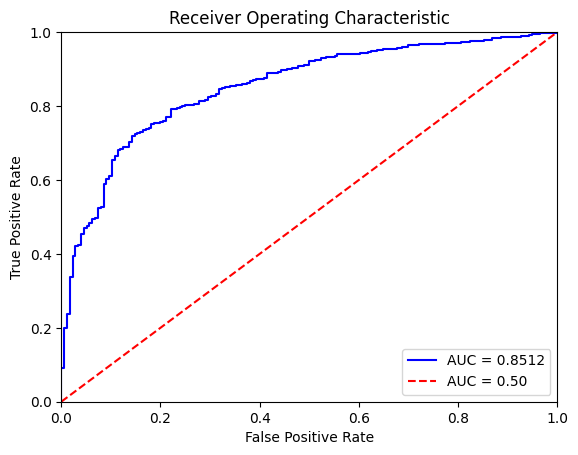

In [20]:
df_ion4 = pd.read_csv("benchmarking/ION_out_lncRNA/output_standard_mode.bed", sep="\t")
df_ion4["class"] = df_ion4["u2"]
df_ion4["prediction_class"] = (df_ion4["prediction"] >= 0.5).astype(int)
fpr4, tpr4, thresholds4 = roc_curve(df_ion4["class"], df_ion4["prediction"], pos_label=1)
roc_auc4 = auc(fpr4, tpr4)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr4, tpr4, 'b', label='AUC = %0.4f' % roc_auc4)
plt.plot([0, 1], [0, 1], 'r--', label="AUC = 0.50")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [21]:
tn4, fp4, fn4, tp4 = confusion_matrix(df_ion4["class"], df_ion4["prediction_class"]).ravel()
fpr4 = fp4 / (fp4 + tn4)
mcc4 = matthews_corrcoef(df_ion4["class"], df_ion4["prediction_class"])
BAcc4 = balanced_accuracy_score(df_ion4["class"], df_ion4["prediction_class"])
recall4 = recall_score(df_ion4["class"], df_ion4["prediction_class"])
precision4 = precision_score(df_ion4["class"], df_ion4["prediction_class"])
acc4 = accuracy_score(df_ion4["class"], df_ion4["prediction_class"])

print("Metrics for ION (High Recall Mode)")
print("FPR:", fpr4)
print("MCC:", mcc4)
print("Accuracy:", acc4)
print("Balanced Accuracy:", BAcc4)
print("Recall:", recall4)
print("Precision:", precision4)
print("AUROC:", roc_auc4)

Metrics for ION (High Recall Mode)
FPR: 0.16477272727272727
MCC: 0.3510161963073467
Accuracy: 0.7415320479416363
Balanced Accuracy: 0.7836492072184843
Recall: 0.7320711417096959
Precision: 0.9777777777777777
AUROC: 0.851236113284306


# ION (High-Precision Mode)
Command ran:  python3 ION.py --mode high-precision --type bed --file ../../benchmarking/annotators_checked_introns.bed

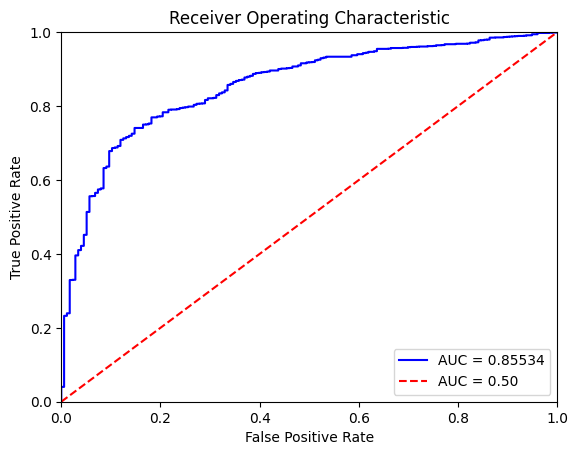

In [22]:
df_ion5 = pd.read_csv("benchmarking/ION_out_lncRNA/output_high_precision_mode.bed", sep="\t")
df_ion5["class"] = df_ion5["u2"]
df_ion5["prediction_class"] = (df_ion5["prediction"] >= 0.5).astype(int)
fpr5, tpr5, thresholds5 = roc_curve(df_ion5["class"], df_ion5["prediction"], pos_label=1)
roc_auc5 = auc(fpr5, tpr5)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr5, tpr5, 'b', label='AUC = %0.5f' % roc_auc5)
plt.plot([0, 1], [0, 1], 'r--', label="AUC = 0.50")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [23]:
tn5, fp5, fn5, tp5 = confusion_matrix(df_ion5["class"], df_ion5["prediction_class"]).ravel()
fpr5 = fp5 / (fp5 + tn5)
mcc5 = matthews_corrcoef(df_ion5["class"], df_ion5["prediction_class"])
BAcc5 = balanced_accuracy_score(df_ion5["class"], df_ion5["prediction_class"])
recall5 = recall_score(df_ion5["class"], df_ion5["prediction_class"])
precision5 = precision_score(df_ion5["class"], df_ion5["prediction_class"])
acc5 = accuracy_score(df_ion5["class"], df_ion5["prediction_class"])

print("Metrics for ION (High Recall Mode)")
print("FPR:", fpr5)
print("MCC:", mcc5)
print("Accuracy:", acc5)
print("Balanced Accuracy:", BAcc5)
print("Recall:", recall5)
print("Precision:", precision5)
print("AUROC:", roc_auc5)

Metrics for ION (High Recall Mode)
FPR: 0.028409090909090908
MCC: 0.21025195488184095
Accuracy: 0.42886920270974466
Balanced Accuracy: 0.6728293042299066
Recall: 0.37406769936890416
Precision: 0.9923896499238964
AUROC: 0.8553385620403693
